In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

In [20]:
dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기
(x_train,y_train),(x_test,y_test) =  imdb.load_data(num_words=dic_siz)
# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id = imdb.get_word_index()
id2word = {word:id for id,word in word2id.items()}

In [21]:
for i in range(1,21):
    print(id2word[i],end='/')

the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

In [22]:
embed_space_dim = 16 # 16차원의 임베딩 공간
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)  # sample_size 셈플의 크기 고정
# 512보다 작은 샘플은 pad_sequence함수가 특수 문자로 채움

In [23]:
# 신경망 설계 및 학습
import tensorflow as tf
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

Epoch 1/20
391/391 - 4s - loss: 0.4523 - accuracy: 0.7562 - val_loss: 0.2847 - val_accuracy: 0.8782 - 4s/epoch - 9ms/step
Epoch 2/20
391/391 - 2s - loss: 0.1745 - accuracy: 0.9357 - val_loss: 0.3371 - val_accuracy: 0.8604 - 2s/epoch - 5ms/step
Epoch 3/20
391/391 - 2s - loss: 0.0659 - accuracy: 0.9825 - val_loss: 0.3725 - val_accuracy: 0.8681 - 2s/epoch - 5ms/step
Epoch 4/20
391/391 - 3s - loss: 0.0189 - accuracy: 0.9970 - val_loss: 0.4347 - val_accuracy: 0.8652 - 3s/epoch - 6ms/step
Epoch 5/20
391/391 - 3s - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.4920 - val_accuracy: 0.8638 - 3s/epoch - 7ms/step
Epoch 6/20
391/391 - 3s - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.5278 - val_accuracy: 0.8658 - 3s/epoch - 7ms/step
Epoch 7/20
391/391 - 2s - loss: 8.3031e-04 - accuracy: 1.0000 - val_loss: 0.5556 - val_accuracy: 0.8666 - 2s/epoch - 5ms/step
Epoch 8/20
391/391 - 2s - loss: 5.2210e-04 - accuracy: 1.0000 - val_loss: 0.5796 - val_accuracy: 0.8663 - 2s/epoch - 5ms/step
Epoch 9/20
391/3

In [24]:
embed.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 512, 16)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                262176    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 422,209
Trainable params: 422,209
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델 평가
res = embed.evaluate(x_test, y_test, verbose=0)
res

[0.7831102609634399, 0.8669599890708923]

In [26]:
import matplotlib.pyplot as plt

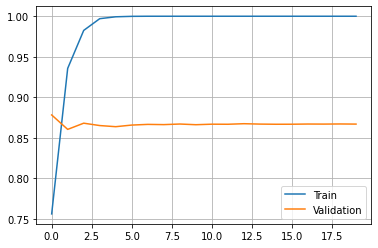

In [27]:
#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [28]:
# 시계열 정보를 단어 임베딩을 이용해서 반영
# 위에서 한건... 단어임베딩에 다층 퍼셉트론(신경망)을 적용. -> LSTM이용안함... -> 시계열 정보를 이용못함
# 에포크가 2.5를 조금 넘어서면서부터 거의 개선사하이 없음.. -> 조기종료
# 조기종료 : 훈련집합을 덜 수렴했어도. 검증집합에 대해  성능개선이 없으면 종료

In [29]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
from tensorflow.python.eager.context import monitoring
# 조기종료 
ealy = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

In [34]:
from pickle import UNICODE
# 신경망 모델 설계 및 학습(LSTM)
embed = Sequential()
embed.add(Embedding(input_dim=dic_size , output_dim=embed_space_dim, input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='Adam', metrics=['accuracy'])
hist = embed.fit(x_train, y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[ealy])

Epoch 1/20
313/313 - 10s - loss: 0.4509 - accuracy: 0.7754 - val_loss: 0.3040 - val_accuracy: 0.8750 - 10s/epoch - 33ms/step
Epoch 2/20
313/313 - 7s - loss: 0.2341 - accuracy: 0.9136 - val_loss: 0.2936 - val_accuracy: 0.8812 - 7s/epoch - 21ms/step
Epoch 3/20
313/313 - 6s - loss: 0.1756 - accuracy: 0.9387 - val_loss: 0.3324 - val_accuracy: 0.8738 - 6s/epoch - 18ms/step
Epoch 4/20
313/313 - 6s - loss: 0.1528 - accuracy: 0.9475 - val_loss: 0.3925 - val_accuracy: 0.8532 - 6s/epoch - 18ms/step
Epoch 5/20
313/313 - 6s - loss: 0.1325 - accuracy: 0.9535 - val_loss: 0.3422 - val_accuracy: 0.8780 - 6s/epoch - 18ms/step
Epoch 6/20
313/313 - 6s - loss: 0.1016 - accuracy: 0.9661 - val_loss: 0.4130 - val_accuracy: 0.8728 - 6s/epoch - 18ms/step
Epoch 7/20
313/313 - 6s - loss: 0.0707 - accuracy: 0.9793 - val_loss: 0.4636 - val_accuracy: 0.8700 - 6s/epoch - 18ms/step


In [35]:
res = embed.evaluate(x_test,y_test,verbose=0)
res

[0.311742901802063, 0.8745599985122681]

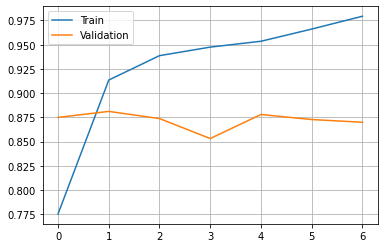

In [36]:
#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [37]:
# 문제점
# 빈도수에 따라서 분류했음
# 문장의 의미를 파악해서 분류 한건 아님

In [38]:
# 문장의 의미를 가지고 해당 문장이 긍정이다 부정이다 판단하는 알고리즘
# workd2vec(구글) 
# - 1000억개 가량의 뉴스데이터를 가지고 학습 300만개 가량의데이터를 300차원공간에 표현

#GloVe(스텐퍼드 대학)
# 위키피디아 문서 데이터를 사용  40만개  50, 100, 200, 300 차원 공안에 표현